In [1]:
import os
os.chdir("C:\\Users\\JAYNE\\Documents\\CLASSWORK")

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings as warn
warn.filterwarnings('ignore', category = DeprecationWarning)
warn.filterwarnings('ignore', category = FutureWarning)
warn.filterwarnings('ignore', category = UserWarning)

In [4]:
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

**Loading the data**

In [5]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
target_data = pd.read_csv("submission.csv")

In [6]:

train_data.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [7]:
train_data.shape

(67463, 35)

In [8]:
test_data.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,56492997,17120,10365,16025.082690,59,BAT2575549,12.163926,A,D1,RENT,76468.82190,Source Verified,n,Home improvement,16.749219,1,0,12,1,3576,67.278287,5,f,4469.449851,0.088031,8.425776,0.731797,0,INDIVIDUAL,135,0,24,475442,4364,NaN
1,22540813,7133,11650,12615.795600,59,BAT2833642,6.564296,B,E3,MORTGAGE,38079.01344,Source Verified,n,Credit card refinancing,18.157975,0,0,11,0,1932,71.313157,21,w,993.907530,0.041237,6.157008,0.992918,0,INDIVIDUAL,56,0,1,72412,2573,NaN
2,9862181,25291,25825,11621.280830,59,BAT1761981,14.729900,A,C3,MORTGAGE,51275.93268,Source Verified,n,Debt consolidation,15.190011,0,0,22,0,598,50.883065,23,f,729.113379,0.021745,5.705077,0.281580,0,INDIVIDUAL,3,0,26,284825,19676,NaN
3,10097822,30781,9664,15375.823510,59,BAT5341619,10.523767,A,A2,RENT,68867.98965,Verified,n,Debt Consolidation,21.292550,0,0,11,0,5222,82.449083,28,w,715.867091,0.092398,2.469688,0.959162,0,INDIVIDUAL,21,0,32,40842,7226,NaN
4,47771809,8878,9419,7176.647582,58,BAT4694572,9.997013,C,B3,OWN,91556.85423,Verified,n,Debt consolidation,4.812117,0,0,11,0,553,49.075855,9,w,248.572854,0.010354,2.127835,0.402315,0,INDIVIDUAL,104,0,33,90825,26145,NaN


In [9]:
test_data.shape

(28913, 35)

**Data Validation Checks**

In [10]:
test_data.drop('Loan Status', axis=1, inplace=True)

In [11]:
train_data_numerical = train_data.select_dtypes(include='number')
train_data_numerical

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,11.135007,176346.62670,16.284758,1,0,13,0,24246,74.932551,7,2929.646315,0.102055,2.498291,0.793724,0,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,12.237563,39833.92100,15.412409,0,0,12,0,812,78.297186,13,772.769385,0.036181,2.377215,0.974821,0,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,12.545884,91506.69105,28.137619,0,0,14,0,1843,2.073040,20,863.324396,18.778660,4.316277,1.020075,0,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,16.731201,108286.57590,18.043730,1,0,7,0,13819,67.467951,12,288.173196,0.044131,0.107020,0.749971,0,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,15.008300,44234.82545,17.209886,1,3,13,1,1544,85.250761,22,129.239553,19.306646,1294.818751,0.368953,0,18,0,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,16164945,13601,6848,13175.28583,59,9.408858,83961.15003,28.105127,1,0,13,0,4112,97.779389,19,1978.945960,0.023478,564.614852,0.865230,0,69,0,48,181775,34301,1
67459,35182714,8323,11046,15637.46301,59,9.972104,65491.12817,17.694279,0,0,12,0,9737,15.690703,14,3100.803125,0.027095,2.015494,1.403368,0,14,0,37,22692,8714,0
67460,16435904,15897,32921,12329.45775,59,19.650943,34813.96985,10.295774,0,0,7,1,2195,1.500090,9,2691.995532,0.028212,5.673092,1.607093,0,137,0,17,176857,42330,0
67461,5300325,16567,4975,21353.68465,59,13.169095,96938.83564,7.614624,0,0,14,0,1172,68.481882,15,3659.334202,0.074508,1.157454,0.207608,0,73,0,61,361339,39075,0


In [12]:
train_data_categorical = train_data.select_dtypes(include= ['object', 'category'])
train_data_categorical

,Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Payment Plan,Loan Title,Initial List Status,Application Type
0,BAT2522922,B,C4,MORTGAGE,Not Verified,n,Debt Consolidation,w,INDIVIDUAL
1,BAT1586599,C,D3,RENT,Source Verified,n,Debt consolidation,f,INDIVIDUAL
2,BAT2136391,F,D4,MORTGAGE,Source Verified,n,Debt Consolidation,w,INDIVIDUAL
3,BAT2428731,C,C3,MORTGAGE,Source Verified,n,Debt consolidation,w,INDIVIDUAL
4,BAT5341619,C,D4,MORTGAGE,Source Verified,n,Credit card refinancing,w,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...
67458,BAT3193689,C,A4,MORTGAGE,Verified,n,Credit card refinancing,w,INDIVIDUAL
67459,BAT1780517,C,B3,RENT,Source Verified,n,Credit card refinancing,w,INDIVIDUAL
67460,BAT1761981,A,F3,MORTGAGE,Verified,n,Lending loan,w,INDIVIDUAL
67461,BAT2333412,D,E3,OWN,Not Verified,n,Debt consolidation,f,INDIVIDUAL


In [13]:
train_data.isnull().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

In [14]:
test_data.isnull().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

In [15]:
duplicates = train_data.duplicated(subset='ID', keep=False)
duplicated_rows = train_data[duplicates]
train_data.drop_duplicates(subset='ID', keep='first', inplace=True)

In [16]:
train_data.shape

(67463, 35)

In [17]:
for column in train_data.columns:
    unique_values = train_data[column].nunique() 
    print(f"Column '{column}' has {unique_values} unique value(s).")

Column 'ID' has 67463 unique value(s).
Column 'Loan Amount' has 27525 unique value(s).
Column 'Funded Amount' has 24548 unique value(s).
Column 'Funded Amount Investor' has 67441 unique value(s).
Column 'Term' has 3 unique value(s).
Column 'Batch Enrolled' has 41 unique value(s).
Column 'Interest Rate' has 67448 unique value(s).
Column 'Grade' has 7 unique value(s).
Column 'Sub Grade' has 35 unique value(s).
Column 'Employment Duration' has 3 unique value(s).
Column 'Home Ownership' has 67454 unique value(s).
Column 'Verification Status' has 3 unique value(s).
Column 'Payment Plan' has 1 unique value(s).
Column 'Loan Title' has 109 unique value(s).
Column 'Debit to Income' has 67454 unique value(s).
Column 'Delinquency - two years' has 9 unique value(s).
Column 'Inquires - six months' has 6 unique value(s).
Column 'Open Account' has 36 unique value(s).
Column 'Public Record' has 5 unique value(s).
Column 'Revolving Balance' has 20582 unique value(s).
Column 'Revolving Utilities' has 67

In [18]:
train_data.drop(columns=['ID', 'Payment Plan', 'Accounts Delinquent'], axis=1, inplace=True)

In [19]:
test_data.drop(columns=['Payment Plan', 'Accounts Delinquent'], axis=1, inplace=True)

In [20]:
test_data_numerical = test_data.select_dtypes(include='number')
test_data_numerical

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,56492997,17120,10365,16025.082690,59,12.163926,76468.82190,16.749219,1,0,12,1,3576,67.278287,5,4469.449851,0.088031,8.425776,0.731797,0,135,24,475442,4364
1,22540813,7133,11650,12615.795600,59,6.564296,38079.01344,18.157975,0,0,11,0,1932,71.313157,21,993.907530,0.041237,6.157008,0.992918,0,56,1,72412,2573
2,9862181,25291,25825,11621.280830,59,14.729900,51275.93268,15.190011,0,0,22,0,598,50.883065,23,729.113379,0.021745,5.705077,0.281580,0,3,26,284825,19676
3,10097822,30781,9664,15375.823510,59,10.523767,68867.98965,21.292550,0,0,11,0,5222,82.449083,28,715.867091,0.092398,2.469688,0.959162,0,21,32,40842,7226
4,47771809,8878,9419,7176.647582,58,9.997013,91556.85423,4.812117,0,0,11,0,553,49.075855,9,248.572854,0.010354,2.127835,0.402315,0,104,33,90825,26145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28908,11537800,35000,35000,35000.000000,60,16.240000,360000.00000,7.310000,0,0,8,1,83274,72.200000,16,10116.330000,0.000000,0.000000,0.000000,0,109,0,883984,114000
28909,11538258,25000,25000,25000.000000,60,14.980000,105000.00000,10.220000,0,1,10,0,26356,50.900000,26,6493.950000,0.000000,0.000000,0.000000,0,104,0,513925,51800
28910,13147685,30000,30000,29950.000000,60,18.240000,74100.00000,27.300000,0,0,19,0,31303,47.700000,45,7785.190000,0.000000,0.000000,0.000000,1,83,0,296294,65600
28911,13917689,25000,25000,24950.000000,60,15.610000,130000.00000,27.290000,2,0,12,0,25470,83.800000,34,5513.520000,0.000000,0.000000,0.000000,0,83,0,428723,30400


In [21]:
test_data_categorical = test_data.select_dtypes(include=['object', 'category'])
test_data_categorical

,Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Loan Title,Initial List Status,Application Type
0,BAT2575549,A,D1,RENT,Source Verified,Home improvement,f,INDIVIDUAL
1,BAT2833642,B,E3,MORTGAGE,Source Verified,Credit card refinancing,w,INDIVIDUAL
2,BAT1761981,A,C3,MORTGAGE,Source Verified,Debt consolidation,f,INDIVIDUAL
3,BAT5341619,A,A2,RENT,Verified,Debt Consolidation,w,INDIVIDUAL
4,BAT4694572,C,B3,OWN,Verified,Debt consolidation,w,INDIVIDUAL
...,...,...,...,...,...,...,...,...
28908,BAT5629144,C,C5,MORTGAGE,Verified,Credit card refinancing,f,INDIVIDUAL
28909,BAT5629144,C,C3,MORTGAGE,Source Verified,Debt consolidation,f,INDIVIDUAL
28910,BAT2136391,D,D5,MORTGAGE,Verified,Debt consolidation,f,INDIVIDUAL
28911,BAT2136391,D,D1,MORTGAGE,Verified,Debt consolidation,f,INDIVIDUAL


**Separate the features and target variable**

In [22]:
# Separating the features and the target variable in the training dataset
X_train = train_data.drop('Loan Status', axis=1)  
y_train = train_data['Loan Status']

In [23]:
y_train.value_counts()

0    61222
1     6241
Name: Loan Status, dtype: int64

In [24]:
np.unique(y_train)

array([0, 1], dtype=int64)

In [25]:
X_train.shape

(67463, 31)

In [26]:
y_train.shape

(67463,)

In [27]:
# Separating the features and the target variable in the testing dataset
X_test = test_data.drop('ID', axis=1)
y_test = target_data

In [28]:
X_test.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,17120,10365,16025.082690,59,BAT2575549,12.163926,A,D1,RENT,76468.82190,Source Verified,Home improvement,16.749219,1,0,12,1,3576,67.278287,5,f,4469.449851,0.088031,8.425776,0.731797,0,INDIVIDUAL,135,24,475442,4364
1,7133,11650,12615.795600,59,BAT2833642,6.564296,B,E3,MORTGAGE,38079.01344,Source Verified,Credit card refinancing,18.157975,0,0,11,0,1932,71.313157,21,w,993.907530,0.041237,6.157008,0.992918,0,INDIVIDUAL,56,1,72412,2573
2,25291,25825,11621.280830,59,BAT1761981,14.729900,A,C3,MORTGAGE,51275.93268,Source Verified,Debt consolidation,15.190011,0,0,22,0,598,50.883065,23,f,729.113379,0.021745,5.705077,0.281580,0,INDIVIDUAL,3,26,284825,19676
3,30781,9664,15375.823510,59,BAT5341619,10.523767,A,A2,RENT,68867.98965,Verified,Debt Consolidation,21.292550,0,0,11,0,5222,82.449083,28,w,715.867091,0.092398,2.469688,0.959162,0,INDIVIDUAL,21,32,40842,7226
4,8878,9419,7176.647582,58,BAT4694572,9.997013,C,B3,OWN,91556.85423,Verified,Debt consolidation,4.812117,0,0,11,0,553,49.075855,9,w,248.572854,0.010354,2.127835,0.402315,0,INDIVIDUAL,104,33,90825,26145


In [29]:
y_test.value_counts()

Loan Status
0              28913
dtype: int64

In [30]:
np.unique(y_test)

array([0], dtype=int64)

In [31]:
X_test.shape

(28913, 31)

In [32]:
y_test.shape

(28913, 1)

**Outlier Detection**

In [33]:
z_scores = np.abs((train_data_numerical - train_data_numerical.mean()) / train_data_numerical.std())
z_score_threshold = 3
outlier_mask = z_scores > z_score_threshold

outlier_counts = outlier_mask.sum()
print(outlier_counts)

outlier_indices = np.where(outlier_mask.any(axis=1))[0]
print(outlier_indices)

ID                                 0
Loan Amount                        0
Funded Amount                      0
Funded Amount Investor            17
Term                            1457
Interest Rate                    356
Home Ownership                  1216
Debit to Income                    0
Delinquency - two years         1022
Inquires - six months           2419
Open Account                    1322
Public Record                    459
Revolving Balance               1133
Revolving Utilities                0
Total Accounts                   608
Total Received Interest         1816
Total Received Late Fee         2366
Recoveries                      1380
Collection Recovery Fee          775
Collection 12 months Medical    1437
Last week Pay                      0
Accounts Delinquent                0
Total Collection Amount          697
Total Current Balance            983
Total Revolving Credit Limit    1189
Loan Status                     6241
dtype: int64
[    2     4     5 ... 67

**Label Encoding on Categorical Features**

In [34]:
from sklearn.preprocessing import LabelEncoder
categorical_features = ['Batch Enrolled', 'Grade', 'Sub Grade', 'Employment Duration',
                        'Home Ownership', 'Verification Status', 'Loan Title',
                        'Initial List Status', 'Application Type']

combined_data = pd.concat([X_train, X_test], axis=0)

label_encoder = LabelEncoder()
for feature in categorical_features:
    combined_data[feature] = label_encoder.fit_transform(combined_data[feature])
    
X_train = combined_data[:len(X_train)]
X_test = combined_data[len(X_train):]

print("X_train:")
print(X_train.head())
print()
print("X_test:")
print(X_test.head())

X_train:
   Loan Amount  Funded Amount  Funded Amount Investor  Term  Batch Enrolled  \
0        10000          32236             12329.36286    59              16   
1         3609          11940             12191.99692    59               4   
2        28276           9311             21603.22455    59              11   
3        11170           6954             17877.15585    59              15   
4        16890          13226             13539.92667    59              32   

   Interest Rate  Grade  Sub Grade  Employment Duration  Home Ownership  \
0      11.135007      1         13                    0           86038   
1      12.237563      2         17                    2            9291   
2      12.545884      5         18                    0           65501   
3      16.731201      2         12                    0           73322   
4      15.008300      2         18                    0           13607   

   Verification Status  Loan Title  Debit to Income  Delinquency 

**Standardize the numerical features**

In [35]:
from sklearn.preprocessing import StandardScaler

# Standardize the numerical features
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

C:\Users\JAYNE\AppData\Local\Temp\ipykernel_2056\3016520941.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])


In [36]:
X_train.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,-0.818483,2.020064,-0.337854,0.248297,16,-0.191268,1,13,0,1.586692,0,42,-0.829943,0.840164,-0.307961,-0.203463,-0.234958,2.111596,0.977986,-1.397725,1,0.387350,-0.198674,-0.160195,-0.094966,-0.147527,0,-0.511670,-0.155120,1.091309,-0.789041
1,-1.582243,-0.469958,-0.358098,0.248297,4,0.105229,2,17,2,-1.370208,1,49,-0.933158,-0.408459,-0.307961,-0.364105,-0.234958,-0.878926,1.127265,-0.676500,0,-0.583384,-0.211235,-0.160534,-0.043073,-0.147527,0,0.873515,-0.125565,0.165689,-0.106997
2,1.365603,-0.792498,1.028905,0.248297,11,0.188142,5,18,0,0.795445,1,42,0.572470,-0.408459,-0.307961,-0.042821,-0.234958,-0.747355,-2.254570,0.164928,1,-0.542629,3.362623,-0.155103,-0.030106,-0.147527,0,-0.119201,-0.151090,-0.501847,0.144957
3,-0.678661,-1.081668,0.479766,0.248297,15,1.313651,2,12,0,1.096772,1,49,-0.621824,0.840164,-0.307961,-1.167316,-0.234958,0.780958,0.646804,-0.796704,1,-0.801484,-0.209719,-0.166892,-0.107503,-0.147527,0,-0.742534,-0.143030,-1.081655,1.773285
4,0.004911,-0.312185,-0.159444,0.248297,32,0.850331,2,18,0,-1.203922,1,38,-0.720484,0.840164,6.030678,-0.203463,2.650186,-0.785512,1.435774,0.405337,1,-0.873015,3.463301,3.459510,-0.216682,-0.147527,0,-1.227349,0.380899,-0.241275,-0.026008


**Correlation Checks**

In [37]:
correlation_matrix = train_data.corr()
correlation_with_target = correlation_matrix['Loan Status'].sort_values(ascending=False)
print(correlation_with_target)

Loan Status                     1.000000
Public Record                   0.010590
Delinquency - two years         0.009990
Total Current Balance           0.009828
Total Received Late Fee         0.009365
Total Collection Amount         0.007892
Last week Pay                   0.006117
Revolving Utilities             0.004120
Home Ownership                  0.003716
Interest Rate                   0.002900
Total Received Interest         0.001680
Total Revolving Credit Limit    0.001454
Funded Amount                   0.001364
Inquires - six months           0.000578
Total Accounts                  0.000222
Funded Amount Investor         -0.000091
Recoveries                     -0.000652
Collection 12 months Medical   -0.000686
Revolving Balance              -0.001073
Debit to Income                -0.003057
Term                           -0.003410
Collection Recovery Fee        -0.003828
Loan Amount                    -0.004473
Open Account                   -0.007073
Name: Loan Statu

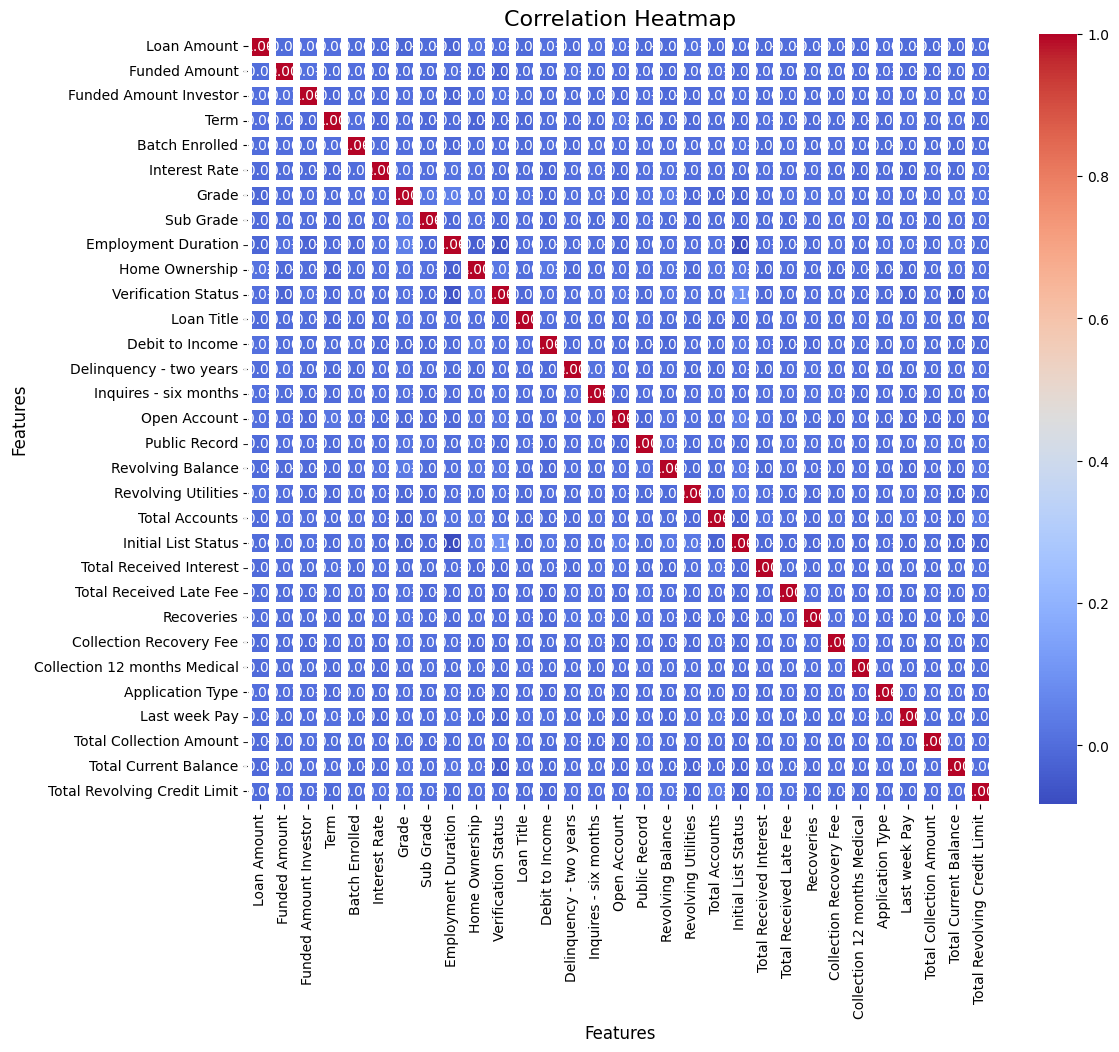

In [38]:
corr_matrix = X_train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=5.0)
plt.title('Correlation Heatmap', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [39]:
corr_pairs = X_train.corr().unstack().sort_values(ascending=False)
top_correlations = corr_pairs[(corr_pairs != 1) & (corr_pairs.abs() > 0.5)]
print(top_correlations)

low_correlations = corr_pairs[(corr_pairs != 1) & (corr_pairs.abs() < 0.5)]
print(low_correlations)

Series([], dtype: float64)
Initial List Status    Verification Status    0.095485
Verification Status    Initial List Status    0.095485
Grade                  Employment Duration    0.045084
Employment Duration    Grade                  0.045084
Initial List Status    Open Account           0.043163
                                                ...   
Total Current Balance  Verification Status   -0.044608
Employment Duration    Verification Status   -0.057099
Verification Status    Employment Duration   -0.057099
Employment Duration    Initial List Status   -0.081950
Initial List Status    Employment Duration   -0.081950
Length: 930, dtype: float64


In [40]:
class_distribution = y_train.value_counts()
print(class_distribution)

0    61222
1     6241
Name: Loan Status, dtype: int64


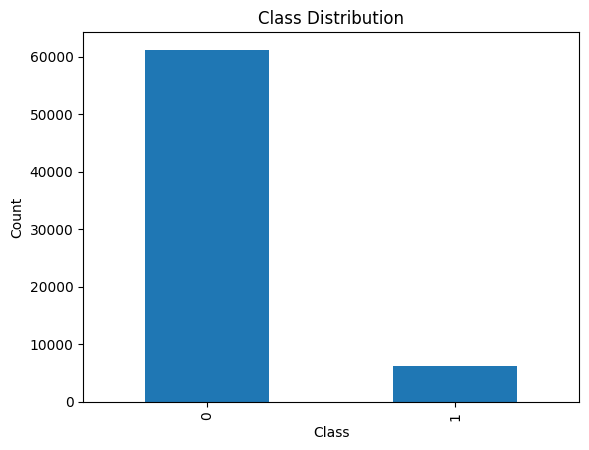

In [41]:
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [42]:
class BaseClassifier:
    def __init__(self):
        pass

    def train(self, X_train, y_train):
        raise NotImplementedError("train method not implemented")

    def predict(self, X_test):
        raise NotImplementedError("predict method not implemented")
        
        
class SVMClassifier(BaseClassifier):
    def __init__(self):
        super().__init__()
        self.classifier = SVC()

    def fit(self, X_train, y_train):
        parameters = {
            'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
            'C': np.logspace(-3, 3, 5),
            'gamma': np.logspace(-3, 3, 5)
        }
        
        svm_cv = GridSearchCV(self.classifier, parameters, cv=10)
        svm_cv.fit(X_train, y_train)
        self.classifier = svm_cv.best_estimator_

    def predict(self, X_test):
        return self.classifier.predict(X_test)
    
        
class LogisticRegressionClassifier(LogisticRegression):
    def __init__(self):
        super().__init__(penalty='l2', solver='lbfgs')

    def train(self, X_train, y_train):
        parameters = {
            'C': [0.01, 0.1, 1],
        }
        
        lr_cv = GridSearchCV(self, parameters, cv=5)
        lr_cv.fit(X_train, y_train)
        self.set_params(**lr_cv.best_params_)

    def predict(self, X_test):
        return super().predict(X_test)


class XGBClassifier(BaseClassifier):
    def __init__(self):
        super().__init__()
        self.classifier = xgb.XGBClassifier(early_stopping_rounds=10, objective='binary:logistic')

    def train(self, X_train, y_train):
        self.classifier.fit(X_train, y_train)

    def predict(self, X_test):
        return self.classifier.predict(X_test)

In [43]:
svm_classifier = SVMClassifier()
lr_classifier = LogisticRegressionClassifier()
xgb_classifier = XGBClassifier()

In [44]:
resampling_techniques = {
    'Random Undersampling': RandomUnderSampler(random_state=42),
    'NearMiss': NearMiss(version=1, n_neighbors=3),
    'Random Oversampling': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42)
}


resampled_data = {}
for technique_name, resampler in resampling_techniques.items():
    X_resampled, y_resampled = resampler.fit_resample(X_train, y_train)
    resampled_data[technique_name] = (X_resampled, y_resampled)
    print(f"Resampling Technique: {technique_name}")
    print("Resampled Data:")
    print(f"X_resampled shape: {X_resampled.shape}")
    print(f"y_resampled shape: {y_resampled.shape}")
    print()

Resampling Technique: Random Undersampling
Resampled Data:
X_resampled shape: (12482, 31)
y_resampled shape: (12482,)

Resampling Technique: NearMiss
Resampled Data:
X_resampled shape: (12482, 31)
y_resampled shape: (12482,)

Resampling Technique: Random Oversampling
Resampled Data:
X_resampled shape: (122444, 31)
y_resampled shape: (122444,)

Resampling Technique: SMOTE
Resampled Data:
X_resampled shape: (122444, 31)
y_resampled shape: (122444,)



In [ ]:
classifiers = {
    'SVM': svm_classifier,
    'Logistic Regression': lr_classifier,
    'xgb_classifier': xgb_classifier
    
}

for clf_name, classifier in classifiers.items():
    print(f"Classifier: {clf_name}")
    for technique_name, (X_resampled, y_resampled) in resampled_data.items():
        print(f"Resampling Technique: {technique_name}")
        
        unique_classes = len(set(y_resampled))
        if unique_classes < 2:
            print("Skipping cross-validation: Insufficient number of classes")
            continue
        
        classifier.fit(X_resampled, y_resampled)
             
        y_pred = classifier.predict(X_test)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}")
    
    print()

Classifier: SVM
Resampling Technique: Random Undersampling
